In [2]:
import numpy as np
import pandas as pd
import os

# 1. Calling sklearn libraries

# 2. Splitting data into train and test data
from sklearn.model_selection import train_test_split

# 3. PReprocessong:
from sklearn.preprocessing import StandardScaler

# 4. Importing class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 5. 
# Installing as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 6. 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("income_evaluation.csv")

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.shape

(32561, 15)

In [12]:
df.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [9]:
# Redundant values removal
df.columns = list(map(lambda a: a.lstrip(), df.columns))

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)

In [13]:
# object type variables cannot be included in a correlation heatmap
stats = df.select_dtypes(['float', 'int64']).drop(columns=['income'])

Text(0.5, 1.0, 'Correlation Factors Heat Map')

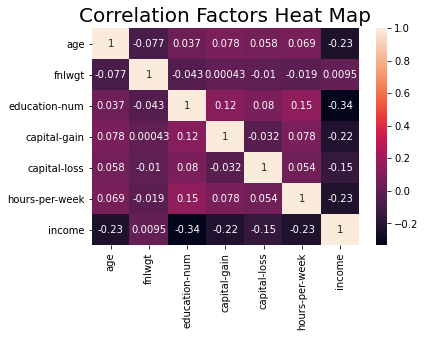

In [14]:
#checking correaltion between the variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [15]:
df_final = pd.get_dummies(df)
df_final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df_final.drop(columns=['income'])
y = df_final['income']

In [17]:
# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Transform data
X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1336, 1038],
       [ 721, 6674]])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.8199406285187839

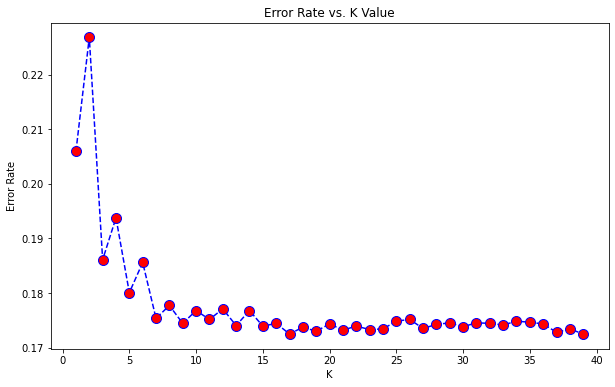

Minimum error:- 0.17248438939502508 at K = 17


In [23]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [24]:
knn = KNeighborsClassifier(n_neighbors=38, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=38)

In [25]:
y_pred = knn.predict(X_test)


In [26]:
accuracy_score(y_test, y_pred)


0.8265943289998976

In [ ]:
#accuracy score is 82.65%